In [11]:
import keras.backend as K
import numpy as np
from keras import Input, layers
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

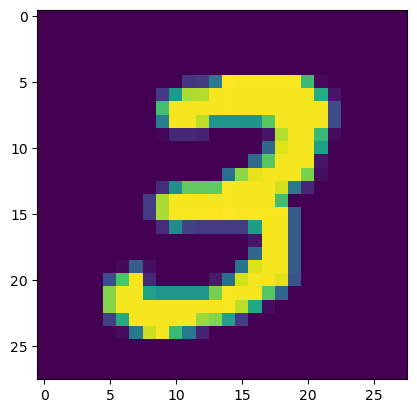

In [3]:
plt.imshow(X_train[7])

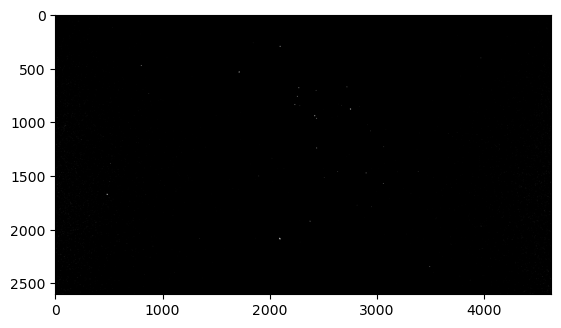

In [48]:
th1 = 45
th2 = 100

img_source = Image.open("Dataset/template matching data/orion_source_2.jpg").convert('L')
img_template = Image.open("Dataset/template matching data/orion_template.jpg").convert('L')

img_source = np.asarray(img_source)
img_template = np.asarray(img_template)

img_source = np.where(img_source >= th1, 255, img_source)
img_source = np.where(img_source < th1, 0, img_source)

img_template = np.where(img_template >= th2, 255, img_template)
img_template = np.where(img_template < th2, 0, img_template)

plt.imshow(img_source, cmap='gray')

In [43]:
img_template = resize(img_template, (500, 500,1,1))
img_template.shape

(500, 500, 1, 1)

In [44]:
# custom filter
def my_filter(shape, dtype=None):

    f = img_template
    
#     assert f.shape == shape
    return K.variable(f, dtype='float32')

In [45]:
input_mat = img_source

# we need to give the batch size. 
# here we will just add a dimension at the beginning which makes batch size=1
print(input_mat.shape)
input_mat = input_mat.reshape((1, img_source.shape[0], img_source.shape[1], 1))

(2604, 4624)


In [46]:
def build_model():
    input_tensor = Input(shape=(img_source.shape[0], img_source.shape[1], 1))

    x = layers.Conv2D(filters=1, 
                      kernel_size = 500,
                      kernel_initializer=my_filter,
                      strides=2, 
                      padding='valid') (input_tensor)

    model = Model(inputs=input_tensor, outputs=x)
    return model

1/1 [==============================] - 58s 58s/step
(1, 1053, 2063, 1)


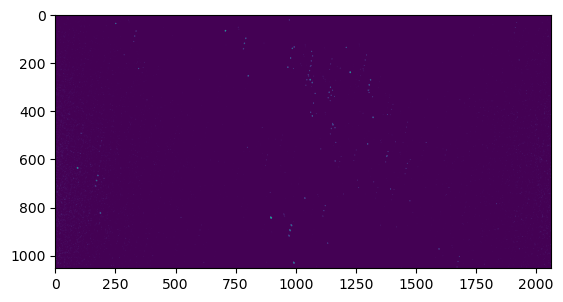

In [47]:
model = build_model()
out = model.predict(input_mat)
print(out.shape)
output = out.reshape((1053,2063))
plt.imshow(output)

In [36]:
2172339/1053

2063.0